tight_layout自动调整子图参数，使子图适合于图区域。这是一个实验性的特性，在某些情况下可能不起作用。它只检查ticktags、axis标签和标题的范围

In [19]:
%matplotlib inline

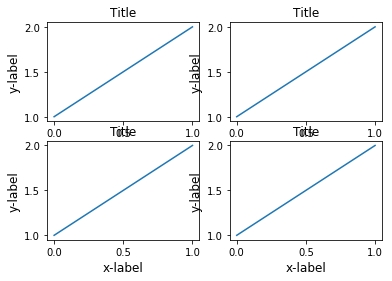

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['savefig.facecolor'] = "0.8"

def example_plot(ax, fontsize=12):
    ax.plot([1, 2])

    ax.locator_params(nbins=3)
    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)

plt.close('all')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
# plt.tight_layout()
plt.show()

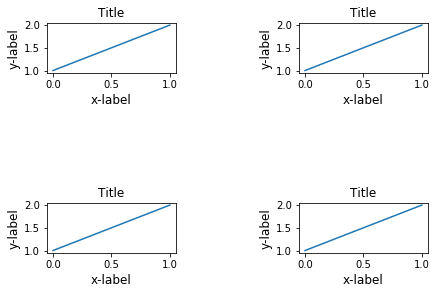

In [3]:
# tight_layout()也可以接受参数来调整布局
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
plt.tight_layout(pad=0.4, w_pad=8., h_pad=8.0)
plt.show()

插播一条：使用subplot2grid和gridspec来创建时，plt.tight_layout()也会起作用

### 与GridSpec一起使用

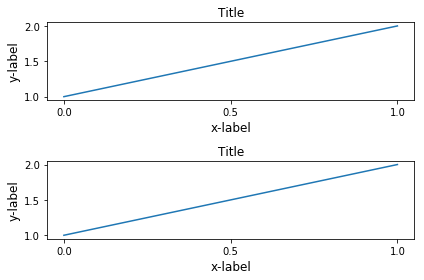

In [4]:
# GridSpec有自己的tight_layout()方法，虽然plt.tight_layout()也是起作用的
import matplotlib.gridspec as gridspec

plt.close('all')
fig = plt.figure()

gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)

gs1.tight_layout(fig)
plt.show()

C:\Users\ZZH\AppData\Roaming\Python\Python35\site-packages\matplotlib\gridspec.py:335: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


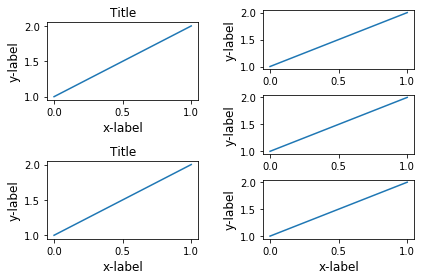

In [14]:
# 也可以提供一个可选的rect参数，该参数指定子图将适合的边界框。坐标必须是标准化的图形坐标，默认值为（0,0,1,1）
fig = plt.gcf()

gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)

gs1.tight_layout(fig, rect=[0, 0, 0.5, 1])

gs2 = gridspec.GridSpec(3, 1)

for ss in gs2:
    ax = fig.add_subplot(ss)
    example_plot(ax)
    ax.set_title("")
    ax.set_xlabel("")

ax.set_xlabel("x-label", fontsize=12)

gs2.tight_layout(fig, rect=[0.5, 0, 1, 1], h_pad=0.5)

top = min(gs1.top, gs2.top)
bottom = max(gs1.bottom, gs2.bottom)

gs1.update(top=top, bottom=bottom)
gs2.update(top=top, bottom=bottom)

top = min(gs1.top, gs2.top)
bottom = max(gs1.bottom, gs2.bottom)

gs1.tight_layout(fig, rect=[None, 0 + (bottom-gs1.bottom),
                            0.5, 1 - (gs1.top-top)])
gs2.tight_layout(fig, rect=[0.5, 0 + (bottom-gs2.bottom),
                            None, 1 - (gs2.top-top)],
                 h_pad=0.5)
plt.show()

### Fix your matplotlib colorbars!
官方解释：如果你使用colorbar命令创建了颜色条，创建的颜色条是Axes而不是Subplot的实例，所以tight_layout没有效果；另一个选项是使用AxesGrid1工具包，显式为颜色条创建一个轴域。没看懂！

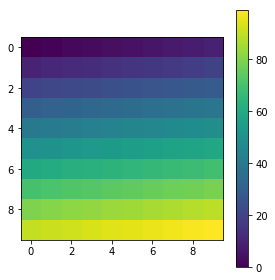

In [26]:
# 官方教程代码
plt.close('all')
arr = np.arange(100).reshape((10, 10))
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(arr, interpolation="none")
plt.colorbar(im, use_gridspec=True)
plt.tight_layout()

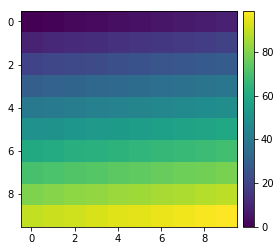

In [25]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.close('all')
arr = np.arange(100).reshape((10, 10))
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(arr, interpolation="none")

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)

plt.tight_layout() # 图和颜色条高宽相同，舒服多了~

> 个人理解，先贴出参数说明：
use_gridspec : bool, optional
If cax is None, a new cax is created as an instance of Axes. If ax is an instance of Subplot and use_gridspec is True, cax is created as an instance of Subplot using the grid_spec module.

可以看到，cax为None时，会创建一个新的轴实例，无法进行协调布局；解决办法：可以使用make_axes_locatable辅助程序为正在绘制图像的轴获取轴分隔符，然后使用该append_axes方法创建颜色条轴，使用“分隔”的形式就可以创建高宽相同的颜色条.

纯属资料+个人理解，如有错误请指正，谢谢。。。。。顺便贴出一个链接可以参考：
https://joseph-long.com/writing/colorbars/
https://stackoverflow.com/questions/9603230/how-to-use-matplotlib-tight-layout-with-figure